Dependancies :




In [ ]:
#Computing
import pandas as pd
import numpy as np
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Importing all the csv files :

In [ ]:
customers_df = pd.read_csv("/content/Customers.csv")

print(customers_df.head())

print("Shape of Customers df : " + str(customers_df.shape))

print("-" * 50)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Shape of Customers df : (200, 4)
--------------------------------------------------


In [ ]:
products_df = pd.read_csv("/content/Products.csv")

print(products_df.head())

print("Shape of Products df : " + str(products_df.shape))

print("-" * 50)

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Shape of Products df : (100, 4)
--------------------------------------------------


In [ ]:
transactions_df = pd.read_csv("/content/Transactions.csv")

print(transactions_df.head())

print("Shape of Transactions df : " + str(transactions_df.shape))

print("-" * 50)

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
Shape of Transactions df : (1000, 7)
--------------------------------------------------


## Quality Checks on data:


#### 1. Check for Missing Values

In [ ]:
print(customers_df.isnull().sum())
print("-" * 50)

print(products_df.isnull().sum())
print("-" * 50)

print(transactions_df.isnull().sum())
print("-" * 50)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
--------------------------------------------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
--------------------------------------------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
--------------------------------------------------


#### 2. Check for Duplicates

In [ ]:
print(customers_df.duplicated().sum())
customers_df = customers_df.drop_duplicates()

print(products_df.duplicated().sum())
products_df = products_df.drop_duplicates()

print(transactions_df.duplicated().sum())
transactions_df = transactions_df.drop_duplicates()

print("-" * 50)

0
0
0
--------------------------------------------------


#### 3. Verify Data Types


Ensuring that `SignupDate` and `TransactionDate` are in datetime format.

In [ ]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [ ]:
print(customers_df.dtypes)
print("-" * 50)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
--------------------------------------------------


In [ ]:
print(products_df.dtypes)
print("-" * 50)

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
--------------------------------------------------


In [ ]:
print(transactions_df.dtypes)
print("-" * 50)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object
--------------------------------------------------


#### 4. Validate Data Consistency

Verifying foreign key relationships:
1. Check if all `CustomerID` in `Transactions` dataframe exist in `Customers` dataframe.
2. Check if all `ProductID` in `Transactions` dataframe exist in `Products` dataframe.

In [ ]:
invalid_customers = transactions_df[~transactions_df['CustomerID'].isin(customers_df['CustomerID'])]
print("Invalid CustomerIDs: " + str(len(invalid_customers)))

invalid_products = transactions_df[~transactions_df['ProductID'].isin(products_df['ProductID'])]
print("Invalid ProductIDs: " + str(len(invalid_products)))

print("-" * 50)

Invalid CustomerIDs: 0
Invalid ProductIDs: 0
--------------------------------------------------


Validating `TotalValue` = `Price` × `Quantity` in `Transactions` dataframe

In [ ]:
transactions_df['ComputedValue'] = transactions_df['Price'] * transactions_df['Quantity']
invalid_values = transactions_df[transactions_df['TotalValue'] != transactions_df['ComputedValue']]
print("Rows with incorrect TotalValue: " + str(len(invalid_values)))

print("-" * 50)

Rows with incorrect TotalValue: 88
--------------------------------------------------




> Reminder to add something here as 88 rows have different value than calculated ones, main reason is that some of the values in totalvalues column are rounded off


## Descriptive Statistics of Data
To capture the central tendency, variability, and range of numerical data like `Price`, `Quantity`, `TotalValue`.


In [ ]:
print("Descriptive Statistics for Numerical Columns:")
print(transactions_df[['Price', 'Quantity', 'TotalValue']].describe())
print("-" * 50)

Descriptive Statistics for Numerical Columns:
            Price     Quantity   TotalValue
count  1000.00000  1000.000000  1000.000000
mean    272.55407     2.537000   689.995560
std     140.73639     1.117981   493.144478
min      16.08000     1.000000    16.080000
25%     147.95000     2.000000   295.295000
50%     299.93000     3.000000   588.880000
75%     404.40000     4.000000  1011.660000
max     497.76000     4.000000  1991.040000
--------------------------------------------------


To understand the distribution (unique entries) of non-numerical data, such as `Region` (from customers) and `Category` (from products)

In [ ]:
print("Region Distribution:")
print(customers_df['Region'].value_counts())
print("-" * 50)

print("\nProduct Categories Distribution:")
print(products_df['Category'].value_counts())
print("-" * 50)

Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
--------------------------------------------------

Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
--------------------------------------------------


Use boxplots to identify outliers for key columns like `Price` or `TotalValue`

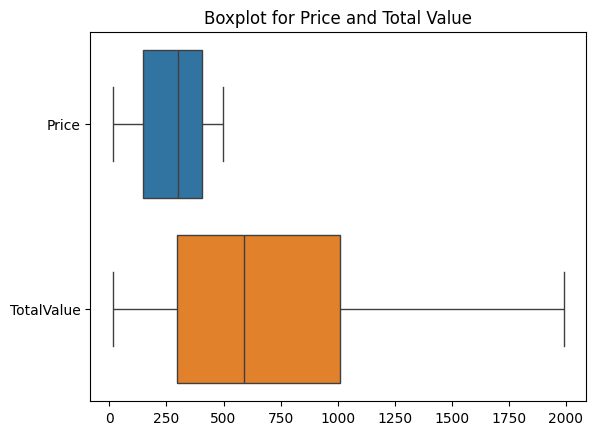

In [ ]:
sns.boxplot(data=transactions_df[['Price', 'TotalValue']], orient='h')
plt.title("Boxplot for Price and Total Value")
plt.show()

Aggregating data by groups provides insights into trends

1. Total sales by `Category`
2. Average quantity purchased by `Region`.


In [ ]:
print("Total Sales by Category:")
print(transactions_df.groupby('ProductID')['TotalValue'].sum().head())
print("-" * 50)

print("\nAverage Quantity Purchased by Region:")
merged_df = transactions_df.merge(customers_df, on='CustomerID')  # Merge for Region
print(merged_df.groupby('Region')['Quantity'].mean())
print("-" * 50)

Total Sales by Category:
ProductID
P001     3047.40
P002     8657.50
P003     1367.72
P004     1722.42
P005    10303.44
Name: TotalValue, dtype: float64
--------------------------------------------------

Average Quantity Purchased by Region:
Region
Asia             2.568807
Europe           2.542735
North America    2.430328
South America    2.595395
Name: Quantity, dtype: float64
--------------------------------------------------


## Visualization of Data

In [ ]:
# Merge data for EDA
merged_df = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")

In [ ]:
# 1: Distribution of Customers by Region
region_distribution = customers_df['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Customer Count']
fig1 = px.bar(region_distribution, x='Region', y='Customer Count', title="Distribution of Customers by Region")
fig1.show()

In [ ]:
# 2: Top 5 Product Categories by Total Sales
top_categories = (merged_df.groupby('Category')['TotalValue']
                  .sum()
                  .sort_values(ascending=False)
                  .reset_index()
                  .head(5))
fig2 = px.pie(top_categories, values='TotalValue', names='Category', title="Top 5 Product Categories by Sales")
fig2.show()

In [ ]:
# 3: Trend of Transactions Over Time
transactions_over_time = (transactions_df.groupby('TransactionDate')['TotalValue']
                          .sum()
                          .reset_index())
transactions_over_time['TransactionDate'] = pd.to_datetime(transactions_over_time['TransactionDate'])
transactions_over_time = transactions_over_time.sort_values('TransactionDate')
fig3 = px.line(transactions_over_time, x='TransactionDate', y='TotalValue', title="Trend of Transactions Over Time")
fig3.show()

In [ ]:
# # Ensure data is aggregated to show just one data point per day (no time component)
# aggregated_sales['TransactionDate'] = aggregated_sales['TransactionDate'].dt.date

# # Aggregate again to remove any time components in the date (if necessary)
# final_aggregated_sales = aggregated_sales.groupby('TransactionDate').agg({
#     'TotalValue': 'sum'
# }).reset_index()

# # Plotting the final aggregated sales trend
# fig6 = px.line(
#     final_aggregated_sales,
#     x='TransactionDate',
#     y='TotalValue',
#     title="Daily Aggregated Sales Trend (One Data Point per Day)",
#     labels={'TransactionDate': 'Date', 'TotalValue': 'Total Sales Value'}
# )
# fig6.show()




# Adding a column to identify weekends
final_aggregated_sales['DayOfWeek'] = pd.to_datetime(final_aggregated_sales['TransactionDate']).dt.day_name()
final_aggregated_sales['IsWeekend'] = final_aggregated_sales['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Calculating the threshold for the top 10% of sales days
threshold_10_percent = np.percentile(final_aggregated_sales['TotalValue'], 90)
final_aggregated_sales['IsPeak'] = final_aggregated_sales['TotalValue'] >= threshold_10_percent

# Plotting the sales trend with highlighted weekends and peak sales
fig8 = px.line(
    final_aggregated_sales,
    x='TransactionDate',
    y='TotalValue',
    title="Daily Aggregated Sales Trend with Highlighted Weekends and Peak Days",
    labels={'TransactionDate': 'Date', 'TotalValue': 'Total Sales Value'},
)

# Adding scatter points for weekends
fig8.add_scatter(
    x=final_aggregated_sales.loc[final_aggregated_sales['IsWeekend'], 'TransactionDate'],
    y=final_aggregated_sales.loc[final_aggregated_sales['IsWeekend'], 'TotalValue'],
    mode='markers',
    marker=dict(size=8, color='blue', symbol='circle'),
    name='Weekends',
)

# Adding scatter points for peak sales days
fig8.add_scatter(
    x=final_aggregated_sales.loc[final_aggregated_sales['IsPeak'], 'TransactionDate'],
    y=final_aggregated_sales.loc[final_aggregated_sales['IsPeak'], 'TotalValue'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='diamond'),
    name='Peak Sales (Top 10%)',
)

fig8.show()



## Merging of Data

Combining the datasets allows us to analyze the relationships between customers, products, and transactions holistically.

1. Merge `Transactions` Dataframe with `Products` Dataframe on `ProductID` to bring in product details.

2. Merge the resulting dataset with `Customers` dataframe on `CustomerID` to include customer details.

3. Validate the merge by checking the shape and sample rows.


In [ ]:
transactions_products = transactions_df.merge(products_df, on='ProductID', how='inner')

merged_data = transactions_products.merge(customers_df, on='CustomerID', how='inner')
print("-" * 50)

print("\nMerged Data Shape:", merged_data.shape)

print("-" * 50)


print(merged_data.head())

print("-" * 50)


--------------------------------------------------

Merged Data Shape: (1000, 14)
--------------------------------------------------
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x  ComputedValue                      ProductName  \
0      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
1      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
2      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
3      601.36   300.68         601.36  ComfortLiving Bluetooth Speaker   
4      902.04   300.68         902.04  ComfortLiving Bluetooth Speaker   

 

In [ ]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ComputedValue,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,1379.58,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,1839.44,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,919.72,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


#### Removing Redundent Columns



In [ ]:
print("Column Names in Merged Dataset:")
print(merged_data.columns)

Column Names in Merged Dataset:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ComputedValue', 'ProductName',
       'Category', 'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


#### Handling Missing Values Post-Merge


Some rows might have missing data after the merge due to mismatches in `ProductID` or `CustomerID`